## Question 1

In [41]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

### Part (a)

In [42]:
T = 500
sigma = 0.7
rho = 0.85
mu = 11.4
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [43]:
z_vec = np.zeros(T)
zt_ind = 1
for zt_ind in range(T):
    if zt_ind == 1:
        zt = unif_vec[0]
    else:
        zt = z_vec[(zt_ind - 1)]
    z_tp1 = rho * zt + (1 - rho) * mu + eps_vec[zt_ind]
    z_vec[zt_ind] = z_tp1

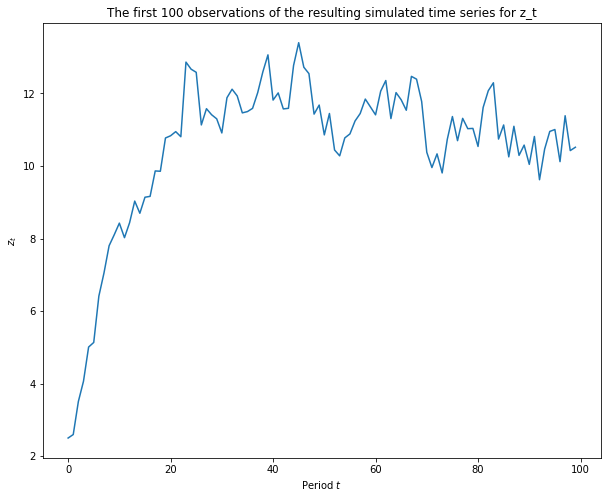

In [44]:
plt.plot(z_vec[:100])
plt.title("The first 100 observations of the resulting simulated time series for z_t")
plt.ylabel(r'$z_t$')
plt.xlabel(r'Period $t$')
plt.show()

### Part (b)

In [45]:
z_vals = np.array([mu-3*sigma, mu-1.5*sigma, mu, mu+1.5*sigma, mu+3*sigma])
print('The desired z_vals vector is', z_vals) 

The desired z_vals vector is [ 9.3  10.35 11.4  12.45 13.5 ]


### Part (c)

In [46]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([ 9.825, 10.875, 11.925, 12.975])

In [47]:
def get_bin(x):
    if x <= z_cuts[0]:
        b = 0
    elif z_cuts[0] < x <= z_cuts[1]:
        b = 1
    elif z_cuts[1] < x <= z_cuts[2]:
        b = 2
    elif z_cuts[2] < x <= z_cuts[3]:
        b = 3
    elif z_vals[3] < x:
        b = 4
    return b

In [48]:
p_raw = np.zeros((5, 5))

In [49]:
for i in range(0, 499):
    prev = z_vec[i]
    rear = z_vec[i+1]
    prev_ind = get_bin(prev)
    rear_ind = get_bin(rear)
    p_raw[prev_ind][rear_ind]+=1

In [50]:
p0 = p_raw[0]/sum(p_raw[0])
p1 = p_raw[1]/sum(p_raw[1])
p2 = p_raw[2]/sum(p_raw[2])
p3 = p_raw[3]/sum(p_raw[3])
p4 = p_raw[4]/sum(p_raw[4])

In [51]:
P_hat = np.array([p0, p1, p2, p3, p4])

In [52]:
P_hat

array([[0.75757576, 0.21212121, 0.03030303, 0.        , 0.        ],
       [0.09821429, 0.51785714, 0.33928571, 0.04464286, 0.        ],
       [0.03184713, 0.22292994, 0.47770701, 0.23566879, 0.03184713],
       [0.        , 0.04273504, 0.34188034, 0.5042735 , 0.11111111],
       [0.        , 0.        , 0.04255319, 0.34042553, 0.61702128]])

In [53]:
print('The probabilities of a 5 × 5 Markov transition matrix P is')
print(P_hat)

The probabilities of a 5 × 5 Markov transition matrix P is
[[0.75757576 0.21212121 0.03030303 0.         0.        ]
 [0.09821429 0.51785714 0.33928571 0.04464286 0.        ]
 [0.03184713 0.22292994 0.47770701 0.23566879 0.03184713]
 [0.         0.04273504 0.34188034 0.5042735  0.11111111]
 [0.         0.         0.04255319 0.34042553 0.61702128]]


### Part (d)

In [54]:
import numpy.linalg as LA

x_row_u = np.dot(LA.matrix_power(P_hat.T, 3), np.array([0, 0, 1, 0, 0]))
print('The probability of zt+3 being in bin 5 (zt+3 > z cuts[3]) given that zt \
is in bin 3 (z cuts[1] < zt ≤ z cuts[2]) today is', x_row_u[4])

The probability of zt+3 being in bin 5 (zt+3 > z cuts[3]) given that zt is in bin 3 (z cuts[1] < zt ≤ z cuts[2]) today is 0.07800905865368545


### Part (e)

In [55]:
eigvals, eigvecmat = LA.eig(P_hat.T)
print(eigvals)

[1.         0.79420747 0.60607221 0.10863411 0.36552089]


In [56]:
import numpy.linalg as LA

eigvals, eigvecmat = LA.eig(P_hat.T)
one_ind = np.array([0])
eigvec = eigvecmat[:, one_ind] / eigvecmat[:, one_ind].sum()
stat_dist = eigvec
print('The stationary (long-run, ergodic) distribution of z_t is')
print(stat_dist)

The stationary (long-run, ergodic) distribution of z_t is
[[0.13226453]
 [0.2244489 ]
 [0.31462926]
 [0.23446894]
 [0.09418838]]


### Part (f)

In [57]:
P = P_hat
T = 500
x_0 = z_vals[1]
x_vec = np.zeros(T)
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)

x_vec = np.zeros(T)
x_t = x_0
xt_ind = 1
for t_ind in range(T):
    # Calculate new index and new value
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(P[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    
    # Update the current value and its index in the loop
    x_t = x_tp1
    xt_ind = xtp1_ind

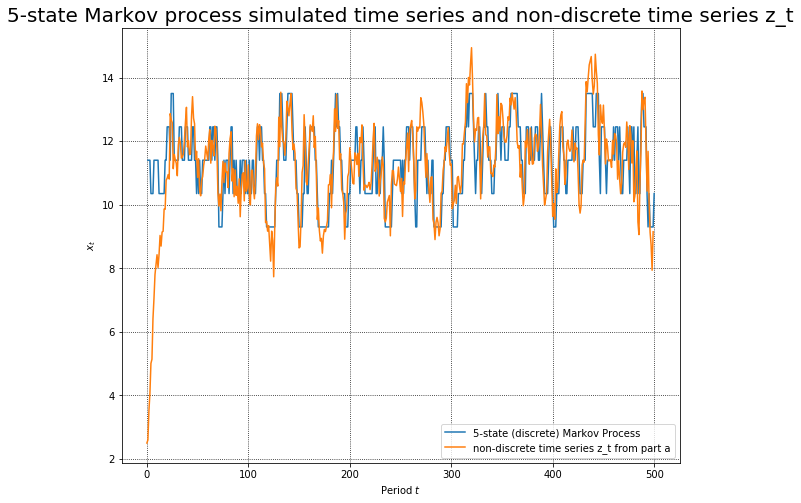

In [61]:
plt.plot(np.arange(1, T + 1), x_vec, '-', label='5-state (discrete) Markov Process')
plt.plot(z_vec, label='non-discrete time series z_t from part a')
plt.grid(b=True, which='major', color='k', linestyle=':')
plt.title(r'5-state Markov process simulated time series and non-discrete time series z_t', fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$x_t$')
plt.legend(loc='lower right')

### References:  
"How do you change the size of figures drawn with matplotlib?" Stackoverflow. https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib. Accessed May 27th, 2018.